In [1]:
from lifelines import CoxPHFitter
import pandas as pd
import os
from datetime import date



In [2]:
#Custom Python Dataprep Files
os.chdir("..")

from dataprep.dataPrep import cleanData
#from dataprep.modelPrep import model_prep
#from dataprep.modelPrep import plotROCCurve

c:\Repositories\DSICapstone


In [3]:
#df = pd.read_csv('../input/mytest.csv')
df = cleanData("PSCCustomerData.csv")

print (df.shape)

df.dtypes

(242, 25)


companyID                     int64
pageviews                   float64
admins                      float64
employees                   float64
usecompetitors                int64
contractdays                float64
callcycle                    object
associateddeals             float64
timescontacted              float64
origsource                   object
sessions                    float64
FF                            int64
assoccontacts               float64
renewalDT                    object
associatedpredictionlead      int64
industry                     object
publiclytraded              float64
strategic                     int64
MRR                         float64
callcycle_numeric             int64
competingProducts             int64
churn                         int64
daysAsCustomer                int32
callsPerQuarter             float64
sessionsPerDay              float64
dtype: object

In [4]:
df.head()

,companyID,pageviews,admins,employees,usecompetitors,contractdays,callcycle,associateddeals,timescontacted,origsource,...,industry,publiclytraded,strategic,MRR,callcycle_numeric,competingProducts,churn,daysAsCustomer,callsPerQuarter,sessionsPerDay
0,527430708,0.0,0.0,500.0,0,0.0,Yearly,0.0,7.0,Offline Sources,...,Construction,0.0,0,1216.0,1,0,1,984,0.649136,0.0
1,527492766,0.0,0.0,2600.0,0,0.0,Yearly,0.0,0.0,Unknown,...,Unknown,0.0,0,1216.0,1,0,0,984,0.000000,0.0
2,527492763,0.0,0.0,2600.0,0,0.0,Yearly,0.0,0.0,Unknown,...,Unknown,0.0,0,1216.0,1,0,0,984,0.000000,0.0
3,527492762,0.0,2.0,2600.0,0,0.0,Yearly,0.0,0.0,Unknown,...,Unknown,0.0,0,1216.0,1,0,0,984,0.000000,0.0
4,527492761,0.0,0.0,2600.0,0,0.0,Yearly,0.0,0.0,Unknown,...,Unknown,0.0,0,1216.0,1,0,0,984,0.000000,0.0


### Days as Customer

In [5]:
df_time = pd.read_csv("PSCCustomerData.csv")
df_time.head()

,Company ID,Mobile Observers,Last Modified Date,Company SQL Date,Lead Status,Total Revenue,Postal Code,SFDC Last Activity Date,Customer Conferences Attended,Twitter Followers,...,Industry,Complexity,Street Address 2,Is Public,Last Call Cycle Date,Strategic?,Workflow,Project Overview,Associated Company ID,Associated Company
0,527430708,NaN,8/21/2019 16:23,NaN,NaN,NaN,2171,NaN,NaN,NaN,...,Construction,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
1,527492766,NaN,8/20/2019 9:25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,527492763,NaN,8/19/2019 16:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,527492762,0.0,8/17/2019 11:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,527492761,NaN,8/17/2019 11:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_time = df_time.filter(items=['Close Date', 'First Deal Created Date', 'Last Call Cycle Date', 
                      'Time of Last Session', 'Last Activity Date'])
df_time

,Close Date,First Deal Created Date,Last Call Cycle Date,Time of Last Session,Last Activity Date
0,8/23/2017 15:58,NaN,NaN,NaN,9/18/2018 0:00
1,8/23/2017 16:53,NaN,NaN,NaN,NaN
2,8/23/2017 16:53,NaN,NaN,NaN,NaN
3,8/23/2017 16:53,NaN,NaN,NaN,NaN
4,8/23/2017 16:53,NaN,NaN,NaN,NaN
...,...,...,...,...,...
237,3/4/2019 9:26,2/13/2019 12:48,4/12/2019,NaN,4/12/2019 10:03
238,3/19/2019 10:59,NaN,9/4/2019,4/27/2018 9:30,9/4/2019 10:00
239,4/5/2019 9:43,4/20/2018 10:30,NaN,4/20/2018 9:57,9/10/2018 8:08
240,6/7/2019 10:05,8/15/2018 15:54,6/7/2019,5/9/2019 13:19,6/10/2019 11:30


In [7]:
df_time['churn'] = df['churn']
df_time

,Close Date,First Deal Created Date,Last Call Cycle Date,Time of Last Session,Last Activity Date,churn
0,8/23/2017 15:58,NaN,NaN,NaN,9/18/2018 0:00,1
1,8/23/2017 16:53,NaN,NaN,NaN,NaN,0
2,8/23/2017 16:53,NaN,NaN,NaN,NaN,0
3,8/23/2017 16:53,NaN,NaN,NaN,NaN,0
4,8/23/2017 16:53,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...
237,3/4/2019 9:26,2/13/2019 12:48,4/12/2019,NaN,4/12/2019 10:03,0
238,3/19/2019 10:59,NaN,9/4/2019,4/27/2018 9:30,9/4/2019 10:00,0
239,4/5/2019 9:43,4/20/2018 10:30,NaN,4/20/2018 9:57,9/10/2018 8:08,0
240,6/7/2019 10:05,8/15/2018 15:54,6/7/2019,5/9/2019 13:19,6/10/2019 11:30,1


In [8]:
#Split the entry to get only the dates & convert to datetime objects
df_time['Close.Date'] = pd.to_datetime(df_time['Close Date'].str.split(' ').str[0], infer_datetime_format = True)
df_time['First.Deal'] = pd.to_datetime(df_time['First Deal Created Date'].str.split(' ').str[0], infer_datetime_format = True)
df_time['Last.Call'] = pd.to_datetime(df_time['Last Call Cycle Date'].str.split(' ').str[0], infer_datetime_format = True)
df_time['Last.Session'] = pd.to_datetime(df_time['Time of Last Session'].str.split(' ').str[0], infer_datetime_format = True)
df_time['Last.Act'] = pd.to_datetime(df_time['Last Activity Date'].str.split(' ').str[0], infer_datetime_format = True)
df_time

,Close Date,First Deal Created Date,Last Call Cycle Date,Time of Last Session,Last Activity Date,churn,Close.Date,First.Deal,Last.Call,Last.Session,Last.Act
0,8/23/2017 15:58,NaN,NaN,NaN,9/18/2018 0:00,1,2017-08-23,NaT,NaT,NaT,2018-09-18
1,8/23/2017 16:53,NaN,NaN,NaN,NaN,0,2017-08-23,NaT,NaT,NaT,NaT
2,8/23/2017 16:53,NaN,NaN,NaN,NaN,0,2017-08-23,NaT,NaT,NaT,NaT
3,8/23/2017 16:53,NaN,NaN,NaN,NaN,0,2017-08-23,NaT,NaT,NaT,NaT
4,8/23/2017 16:53,NaN,NaN,NaN,NaN,0,2017-08-23,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...
237,3/4/2019 9:26,2/13/2019 12:48,4/12/2019,NaN,4/12/2019 10:03,0,2019-03-04,2019-02-13,2019-04-12,NaT,2019-04-12
238,3/19/2019 10:59,NaN,9/4/2019,4/27/2018 9:30,9/4/2019 10:00,0,2019-03-19,NaT,2019-09-04,2018-04-27,2019-09-04
239,4/5/2019 9:43,4/20/2018 10:30,NaN,4/20/2018 9:57,9/10/2018 8:08,0,2019-04-05,2018-04-20,NaT,2018-04-20,2018-09-10
240,6/7/2019 10:05,8/15/2018 15:54,6/7/2019,5/9/2019 13:19,6/10/2019 11:30,1,2019-06-07,2018-08-15,2019-06-07,2019-05-09,2019-06-10


In [9]:
df_time = df_time[['churn', 'Close.Date','First.Deal','Last.Call','Last.Session','Last.Act']]
df_time.head()

,churn,Close.Date,First.Deal,Last.Call,Last.Session,Last.Act
0,1,2017-08-23,NaT,NaT,NaT,2018-09-18
1,0,2017-08-23,NaT,NaT,NaT,NaT
2,0,2017-08-23,NaT,NaT,NaT,NaT
3,0,2017-08-23,NaT,NaT,NaT,NaT
4,0,2017-08-23,NaT,NaT,NaT,NaT


In [10]:
df_time['open'] = df_time[['Close.Date','First.Deal']].min(axis=1)
df_time['open'].isna().sum()
#No missing start entries

0

In [11]:
df_time['close'] = df_time[['Last.Call','Last.Session','Last.Act']].max(axis=1)
df_time['close'].isna().sum()
#19 missing ending entries

19

In [12]:
#If the customer has not churned, set the close date to TODAY
today = date.today()
df_time.loc[df['churn'] == 0, 'close'] = today


df_time['days_cust'] = df_time['close'] - df_time['open']
df_time

,churn,Close.Date,First.Deal,Last.Call,Last.Session,Last.Act,open,close,days_cust
0,1,2017-08-23,NaT,NaT,NaT,2018-09-18,2017-08-23,2018-09-18,391 days
1,0,2017-08-23,NaT,NaT,NaT,NaT,2017-08-23,2020-05-04,985 days
2,0,2017-08-23,NaT,NaT,NaT,NaT,2017-08-23,2020-05-04,985 days
3,0,2017-08-23,NaT,NaT,NaT,NaT,2017-08-23,2020-05-04,985 days
4,0,2017-08-23,NaT,NaT,NaT,NaT,2017-08-23,2020-05-04,985 days
...,...,...,...,...,...,...,...,...,...
237,0,2019-03-04,2019-02-13,2019-04-12,NaT,2019-04-12,2019-02-13,2020-05-04,446 days
238,0,2019-03-19,NaT,2019-09-04,2018-04-27,2019-09-04,2019-03-19,2020-05-04,412 days
239,0,2019-04-05,2018-04-20,NaT,2018-04-20,2018-09-10,2018-04-20,2020-05-04,745 days
240,1,2019-06-07,2018-08-15,2019-06-07,2019-05-09,2019-06-10,2018-08-15,2019-06-10,299 days


In [13]:
df_time = df_time[['open','close','days_cust']]
df_time

,open,close,days_cust
0,2017-08-23,2018-09-18,391 days
1,2017-08-23,2020-05-04,985 days
2,2017-08-23,2020-05-04,985 days
3,2017-08-23,2020-05-04,985 days
4,2017-08-23,2020-05-04,985 days
...,...,...,...
237,2019-02-13,2020-05-04,446 days
238,2019-03-19,2020-05-04,412 days
239,2018-04-20,2020-05-04,745 days
240,2018-08-15,2019-06-10,299 days


In [14]:
df_time['days_cust'] = pd.to_numeric(df_time['days_cust'].astype(str).str.split(' ').str[0], errors='coerce')
df_time

,open,close,days_cust
0,2017-08-23,2018-09-18,391.0
1,2017-08-23,2020-05-04,985.0
2,2017-08-23,2020-05-04,985.0
3,2017-08-23,2020-05-04,985.0
4,2017-08-23,2020-05-04,985.0
...,...,...,...
237,2019-02-13,2020-05-04,446.0
238,2019-03-19,2020-05-04,412.0
239,2018-04-20,2020-05-04,745.0
240,2018-08-15,2019-06-10,299.0


In [15]:
df2 = pd.concat([df, df_time], axis=1, sort=False)
df2

,companyID,pageviews,admins,employees,usecompetitors,contractdays,callcycle,associateddeals,timescontacted,origsource,...,MRR,callcycle_numeric,competingProducts,churn,daysAsCustomer,callsPerQuarter,sessionsPerDay,open,close,days_cust
0,527430708,0.0,0.0,500.0,0,0.0,Yearly,0.0,7.0,Offline Sources,...,1216.0,1,0,1,984,0.649136,0.000000,2017-08-23,2018-09-18,391.0
1,527492766,0.0,0.0,2600.0,0,0.0,Yearly,0.0,0.0,Unknown,...,1216.0,1,0,0,984,0.000000,0.000000,2017-08-23,2020-05-04,985.0
2,527492763,0.0,0.0,2600.0,0,0.0,Yearly,0.0,0.0,Unknown,...,1216.0,1,0,0,984,0.000000,0.000000,2017-08-23,2020-05-04,985.0
3,527492762,0.0,2.0,2600.0,0,0.0,Yearly,0.0,0.0,Unknown,...,1216.0,1,0,0,984,0.000000,0.000000,2017-08-23,2020-05-04,985.0
4,527492761,0.0,0.0,2600.0,0,0.0,Yearly,0.0,0.0,Unknown,...,1216.0,1,0,0,984,0.000000,0.000000,2017-08-23,2020-05-04,985.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,527768953,0.0,0.0,200.0,0,0.0,Half Year,2.0,4.0,Offline Sources,...,1760.0,2,0,0,446,0.818386,0.000000,2019-02-13,2020-05-04,446.0
238,1748405063,5.0,0.0,10000.0,0,0.0,Quarterly,0.0,13.0,Direct Traffic,...,1216.0,4,0,0,412,2.879248,0.004854,2019-03-19,2020-05-04,412.0
239,767264663,24.0,0.0,50.0,0,0.0,Yearly,2.0,4.0,Organic Search,...,100.0,1,0,0,745,0.489933,0.010738,2018-04-20,2020-05-04,745.0
240,690475591,10.0,0.0,200.0,0,0.0,Monthly,8.0,7.0,Organic Search,...,1216.0,12,0,1,627,1.018740,0.006380,2018-08-15,2019-06-10,299.0


### MIA Days Imputation, Set to Average Days Cust

In [16]:
avg_days = df2['days_cust'].mean(skipna=True)
avg_days

1086.7416666666666

In [17]:
#Set negative or missing survival as the average days
df2.loc[(df2['days_cust'] < 0) | (df2['days_cust'].isnull()), 'days_cust'] = avg_days
df2['days_cust'].isna().sum()

0

In [18]:
df2['churn'].isna().sum()

0

### Cohort Analysis using KMF

In [19]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

Text(0, 0.5, '% Surviving')

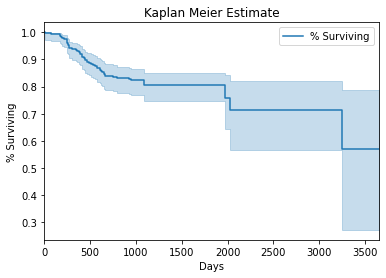

In [20]:
#KMF is most appropriate for drawing generalizations on the population
kmf = KaplanMeierFitter() 

## Fit the data into the model
kmf.fit(df2['days_cust'], df2['churn'],label='% Surviving')

## Create an estimate
kmf.plot(ci_show = True) #dataset is too small to have a meaningful CI
plt.title('Kaplan Meier Estimate')
plt.xlabel('Days')
plt.ylabel('% Surviving')

#Between 0-1000 for more nuanced view

Text(0, 0.5, '% Surviving')

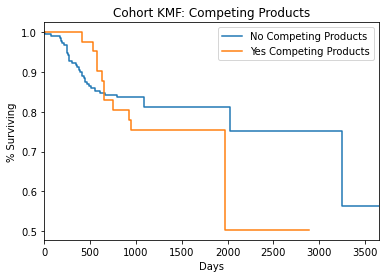

In [21]:
#Example Cohort 1, Usage of Competing Products
kmf1 = KaplanMeierFitter() ## instantiate the class to create an object
#kmf1.fit(df2['days_cust'], df2['churn'], label = "Kaplan Meier Estimate")

#Spliot Cohort
groups = df2['competingProducts']   
i1 = (groups == 0)      ## group i1 , having the pandas series  for the 1st cohort
i2 = (groups == 1)     ## group i2 , having the pandas series  for the 2nd cohort

T = df2['days_cust']
E = df2['churn']

## fit the model for 1st cohort
kmf1.fit(T[i1], E[i1], label='No Competing Products')
a1 = kmf1.plot(ci_show=False)

## fit the model for 2nd cohort
kmf1.fit(T[i2], E[i2], label='Yes Competing Products')
kmf1.plot(ax=a1, ci_show=False)

plt.title('Cohort KMF: Competing Products')
plt.xlabel('Days')
plt.ylabel('% Surviving')


In [22]:
#Example Cohort 2, Call Cycle Type
df2['callcycle_numeric'].unique()

array([ 1,  4,  6,  2, 12], dtype=int64)

Text(0, 0.5, '% Surviving')

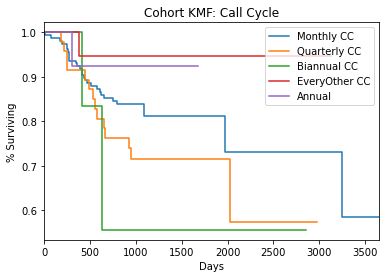

In [23]:
kmf2 = KaplanMeierFitter() ## instantiate the class to create an object

#Split cohorts
groups = df2['callcycle_numeric']   
i1 = (groups == 1) #monthly
i2 = (groups == 4) #quarterly
i3 = (groups == 6) #6 months
i4 = (groups == 2) #every other month
i5 = (groups == 12) #annual

## fit the model for 1st cohort
kmf2.fit(T[i1], E[i1], label='Monthly CC')
a2 = kmf2.plot(ci_show=False)

## fit the model for 2nd cohort
kmf2.fit(T[i2], E[i2], label='Quarterly CC')
kmf2.plot(ax=a2, ci_show=False)

## fit the model for 2nd cohort
kmf2.fit(T[i3], E[i3], label='Biannual CC')
kmf2.plot(ax=a2, ci_show=False)

## fit the model for 2nd cohort
kmf2.fit(T[i4], E[i4], label='EveryOther CC')
kmf2.plot(ax=a2, ci_show=False)

## fit the model for 2nd cohort
kmf2.fit(T[i5], E[i5], label='Annual')
kmf2.plot(ax=a2, ci_show=False)

plt.title('Cohort KMF: Call Cycle')
plt.xlabel('Days')
plt.ylabel('% Surviving')

### Covariate Models

In [24]:
from lifelines import AalenAdditiveFitter, WeibullAFTFitter, CoxPHFitter

In [25]:
#Start focusing on only the features marked by Random Forest
df3 = df2[['days_cust','callsPerQuarter','associateddeals','timescontacted','sessions','assoccontacts',
               'sessionsPerDay','pageviews','employees','callcycle_numeric','churn']]

In [26]:
df_dummy = pd.get_dummies(df3, drop_first=True)
df_dummy.head()

,days_cust,callsPerQuarter,associateddeals,timescontacted,sessions,assoccontacts,sessionsPerDay,pageviews,employees,callcycle_numeric,churn
0,391.0,0.649136,0.0,7.0,0.0,2.0,0.0,0.0,500.0,1,1
1,985.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2600.0,1,0
2,985.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2600.0,1,0
3,985.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2600.0,1,0
4,985.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2600.0,1,0


In [27]:
# Using Cox Proportional Hazards model
cph = CoxPHFitter()   ## Instantiate the class to create a cph object
cph.fit(df_dummy, 'days_cust', event_col='churn')   ## Fit the data to train the model
cph.print_summary()    ## Significance of the features

In [28]:
df4 = df3[['days_cust','associateddeals','sessions',
            'callcycle_numeric','churn']]
# Using Cox Proportional Hazards model
cph = CoxPHFitter()   ## Instantiate the class to create a cph object
cph.fit(df4, 'days_cust', event_col='churn')   ## Fit the data to train the model
cph.print_summary()    ## Significance of the features

#similar concordance, but all features are now significant. no observable decrease in survival model quality

In [29]:
df4

,days_cust,associateddeals,sessions,callcycle_numeric,churn
0,391.0,0.0,0.0,1,1
1,985.0,0.0,0.0,1,0
2,985.0,0.0,0.0,1,0
3,985.0,0.0,0.0,1,0
4,985.0,0.0,0.0,1,0
...,...,...,...,...,...
237,446.0,2.0,0.0,2,0
238,412.0,0.0,2.0,4,0
239,745.0,2.0,8.0,1,0
240,299.0,8.0,4.0,12,1


In [30]:
tr_rows = df4.iloc[20:25, 1:5]
tr_rows

,associateddeals,sessions,callcycle_numeric,churn
20,2.0,0.0,4,1
21,1.0,5.0,1,0
22,1.0,1.0,1,0
23,4.0,0.0,1,0
24,1.0,2.0,1,1


Text(0, 0.5, '% Surviving')

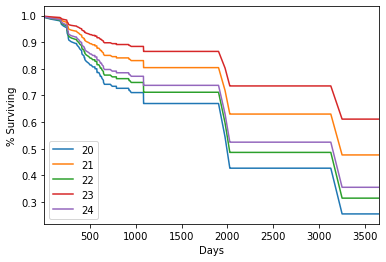

In [31]:
cph.predict_survival_function(tr_rows).plot()
plt.xlabel('Days')
plt.ylabel('% Surviving')

Text(0, 0.5, '% Surviving')

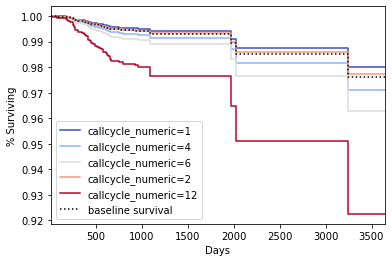

In [32]:
cph.plot_covariate_groups('callcycle_numeric', [1, 4, 6, 2, 12], cmap='coolwarm')
plt.xlabel('Days')
plt.ylabel('% Surviving')

In [33]:
# Using AalenAdditiveFitter
aaf = AalenAdditiveFitter(coef_penalizer=0.1)
aaf.fit(df3, 'days_cust', 'churn')
aaf.print_summary()

In [34]:
# Using Weibull ATF Fitter
aft = WeibullAFTFitter()
df6 = df2[['days_cust','associateddeals','sessions',
               'callcycle_numeric','churn']]
aft.fit(df6, 'days_cust', 'churn')
aft.print_summary()

#Potentially the best survival model, 0.79 concordance and highest log-liklihood